Had trouble getting zip function to work.... learned it can be called as such (much easier to run!!!)

In [ ]:
a = [[1,2,3],[4,5,6]]

zipped = list(zip(*a))
x,y, z = zipped

Reading in Warriors Rockets October $17^{th}$ 2017

In [3]:
import json
import numpy as np

In [4]:
reader = open('warriors_game1.json')
game1 = json.load(reader)

In [5]:
# player = game1['2017/10/17/HOUGSW/']['homeplayers']['NickYoung']
player = game1['2017/10/17/HOUGSW/']['homeplayers']['KevinDurant']


In [6]:
dx = np.subtract(player['x'][2:], player['x'][:-2])
dy = np.subtract(player['y'][2:], player['y'][:-2])


dist = np.sqrt(dx**2 + dy**2)

In [7]:
dist[0:20]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

work on running average of position to 'smooth' out the points

In [8]:
x = player['x']
y = player['y']
time = np.linspace(0,len(x),len(x))*0.04

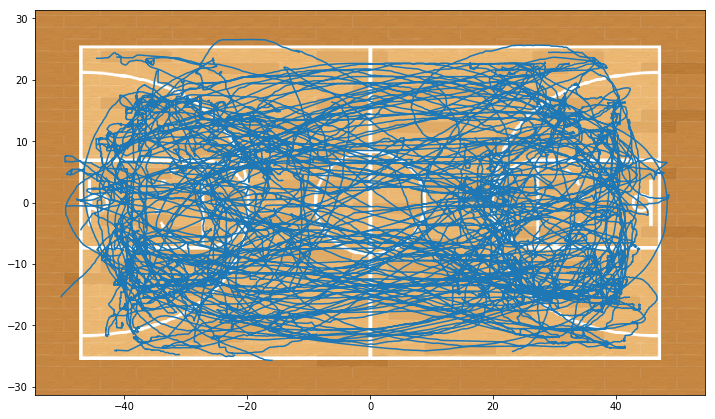

In [11]:
from imageio import imread
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,10))
img = imread("court.png")
plt.imshow(img,zorder=0, extent = [-54.5,54.5,-31.3,31.3])
plt.plot(x,y)

In [ ]:
def moving_average(a, n) : #https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
count = 0
false_count = 0
on_court = game1['2017/10/17/HOUGSW/']['on_court']
for i in range(len(on_court)):
    if on_court[i] == True:
        count+= 1
    else:
        false_count +=1 
print("There are %d points where the clock is stopped." %count)

In [ ]:
new_x = moving_average(x,n=5)
new_y = moving_average(y,n=5)
new_time = time[2:-2]

In [ ]:
dx = new_x[2:]-new_x[:-2]
dy = new_y[2:]-new_y[:-2]
dist = np.sqrt(np.square(dx)+np.square(dy)) # change in distance is 0.08 seconds apart
velo = dist/0.08
time_velo = new_time[1:-1]

dxx = np.array(x[2:])-np.array(x[:-2])
dyy = np.array(y[2:])-np.array(y[:-2])
distt = np.sqrt(np.square(dxx)+np.square(dyy))
veloo = distt/0.08
vt = np.linspace(0,len(veloo),len(veloo))*0.04

import matplotlib.pylab as plt
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.plot(vt,veloo)
avg = np.nanmean(veloo)
plt.title('%f'%avg)

Plot of Velo w/ outlier data

In [ ]:
import matplotlib.pylab as plt
import matplotlib.cm as cm
colors = np.random.random(len(time_velo[velo>50]))
%matplotlib notebook
plt.figure(figsize = (8,6))
plt.scatter(time_velo[velo>50],velo[velo>50],c=colors,s=(2/50*velo[velo>50])**2)
plt.plot(time_velo,velo,linewidth=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Velocity (ft/s)')
plt.title('Smoothed Velocity Plot w/ Outliers')
plt.savefig('smoothed_velo.png')

In [ ]:
high_velos = velo[velo>30]
findee = list(velo)
for i in high_velos:
    print(findee.index(i))
    findee[findee.index(i)] = 0

In [ ]:
plt.figure()
# plt.plot(vt,veloo,'b')
plt.scatter(time_velo,findee,c='r', s=(1/20*np.array(findee))**9)
plt.plot(time_velo,findee,'b',linewidth=0.3)

In [ ]:
# new_x[233:245], new_y[233:245], dist[234:245], velo[234:239], 
x[1673:1685], y[1673:1685], new_x[1673:1685]

In [ ]:
len(new_x)

Working with NaN types

In [ ]:
x = np.array([1,2,3,4,5,np.NaN, 6,7,8])
y = np.array([2,3,5,np.NaN, 2,4,6,7,8])

In [ ]:
plt.figure()
plt.plot(x,y,'r-o')

In [ ]:
a = np.linspace(1,100,100)

In [ ]:
np.nanpercentile(a,40)

In [ ]:
np.arange(25)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

creating a 'flag' to determine offense/defense